In [1]:
#General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#Hiding Pink Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Seaborn plot background color, making plots stand out more

In [2]:
sns.set_style('darkgrid')

In [3]:
train = pd.read_csv("../datasets/train_cleaned.csv")
test = pd.read_csv("../datasets/test_cleaned.csv")

In [4]:
#Train File
train['Age'] = train['Yr Sold'] - train['Year Built']
train['SalePrice'][train['Year Built']>2000].count()
train['after2000'] = (train['Year Built']>2000)
train['after2000'] = train['after2000'].map({True:1,False:0})
train['after2000'].value_counts()
#Test File
test['Age'] = test['Yr Sold'] - test['Year Built']
test['after2000'] = (test['Year Built']>2000)
test['after2000'] = test['after2000'].map({True:1,False:0})
test['after2000'].value_counts()

0    670
1    208
Name: after2000, dtype: int64

In [5]:
train.shape

(2045, 85)

In [6]:
train['SalePrice'].describe()
train['SalePrice'].median()

162000.0

In [7]:
num_features = [n for n in train._get_numeric_data().columns if n != 'SalePrice']
len(num_features)

55

In [8]:
cat_features = [n for n in train.columns if n not in num_features and n != 'SalePrice']
len(cat_features)

29

### Plotting Sale Price by itself

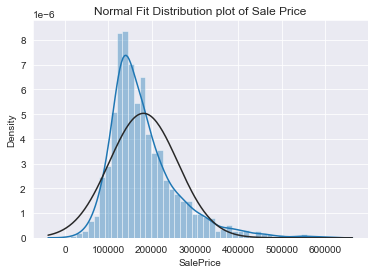

In [9]:
sns.distplot(train['SalePrice'], fit=norm);
plt.title('Normal Fit Distribution plot of Sale Price');

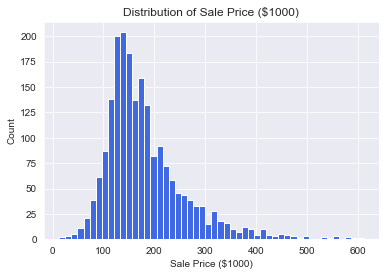

In [10]:
plt.hist(train['SalePrice']/1000,bins=50,color='royalblue',edgecolor='white')
plt.xlabel('Sale Price ($1000)')
plt.ylabel('Count')
plt.title('Distribution of Sale Price ($1000)')
plt.savefig('../figures/price_dist.png')

In [11]:
round(train[['SalePrice']].groupby(train['Neighborhood']).mean().sort_values(by='SalePrice'))

,SalePrice
Neighborhood,
MeadowV,100231.0
IDOTRR,101103.0
BrDale,103371.0
OldTown,125276.0
BrkSide,127023.0
Edwards,129906.0
SWISU,134759.0
Landmrk,137000.0
Sawyer,137182.0


### Boxplot of Every Neighborhood

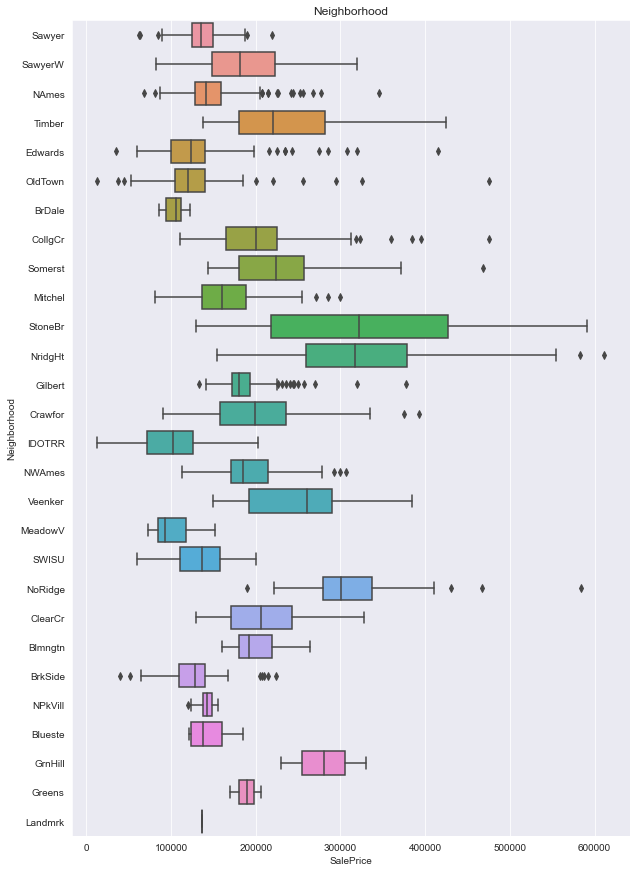

In [12]:
plt.figure(figsize=(10,15))
sns.boxplot(y=train['Neighborhood'],x=train['SalePrice'])
plt.title('Neighborhood');

### Sale Price aggregate based on the year the house was sold

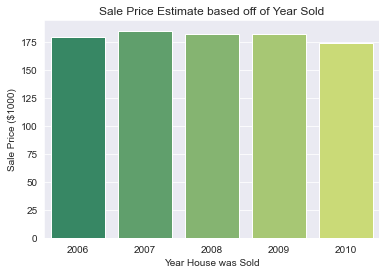

In [13]:
sns.barplot(x=train['Yr Sold'],y=train['SalePrice']/1000,palette='summer',ci=False)
plt.title('Sale Price Estimate based off of Year Sold');
plt.xlabel('Year House was Sold')
plt.ylabel('Sale Price ($1000)');

### Sale Price aggregate based on the month the house was sold

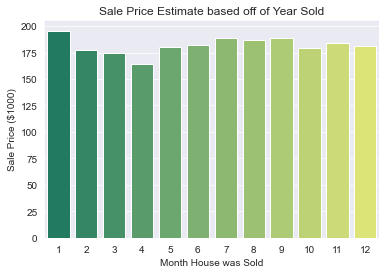

In [14]:
sns.barplot(x=train['Mo Sold'],y=train['SalePrice']/1000,palette='summer',ci=False)
plt.title('Sale Price Estimate based off of Year Sold');
plt.xlabel('Month House was Sold')
plt.ylabel('Sale Price ($1000)');


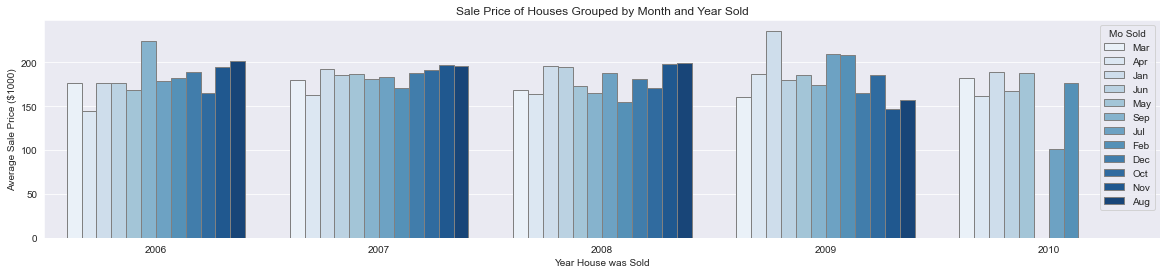

In [15]:
plt.figure(figsize=(20,4))
sns.barplot(data=train,
            y=train['SalePrice']/1000,
            hue=train['Mo Sold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}),
            x='Yr Sold',
            edgecolor='gray',palette='Blues',
            ci=False,)
plt.xlabel('Year House was Sold')
plt.ylabel('Average Sale Price ($1000)')
plt.title('Sale Price of Houses Grouped by Month and Year Sold');
plt.savefig('../figures/pricebyselldates.png')

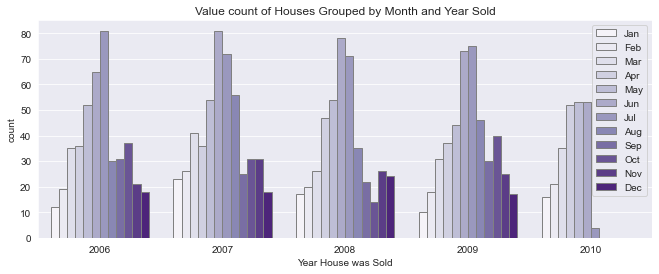

In [16]:
plt.figure(figsize=(11,4))
sns.countplot(data=train, hue='Mo Sold',x='Yr Sold', edgecolor='gray',palette='Purples')
plt.legend(labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Year House was Sold')
plt.title('Value count of Houses Grouped by Month and Year Sold');
plt.savefig('../figures/selldates.png')

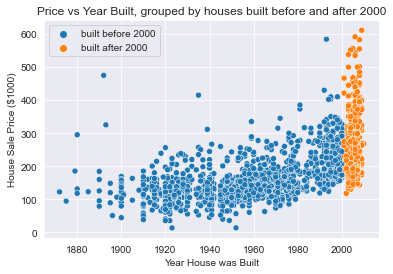

In [17]:
sns.scatterplot(x=train['Year Built'],y=train['SalePrice']/1000,hue=train['after2000'].map({0:'built before 2000',1:'built after 2000'}))
plt.legend()
plt.xlabel('Year House was Built')
plt.ylabel('House Sale Price ($1000)')
plt.title('Price vs Year Built, grouped by houses built before and after 2000');
plt.savefig('../figures/price_by_year.png')

In [18]:
train.groupby('after2000').mean()[['SalePrice']]

,SalePrice
after2000,
0,157441.017083
1,250667.265774


### Mean Sale Price by Lot Configuration

In [19]:
train[['SalePrice']].groupby(train['Lot Config']).mean().sort_values(by='SalePrice')

,SalePrice
Lot Config,
FR2,174703.600000
Inside,177404.655333
Corner,180689.043228
FR3,198600.000000
CulDSac,229833.418605


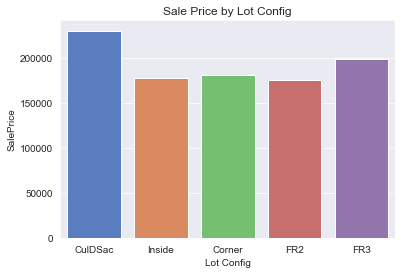

In [20]:
sns.barplot(data=train,x='Lot Config',y='SalePrice',palette='muted',ci=False)
plt.title('Sale Price by Lot Config');
plt.savefig('../figures/lotconfig.png')

### Mean Sale Price by Lot Shape

In [21]:
train[['SalePrice']].groupby(train['Lot Shape']).mean().sort_values(by='SalePrice')

,SalePrice
Lot Shape,
Reg,162925.812355
IR3,197330.000000
IR1,211709.912917
IR2,231858.698113


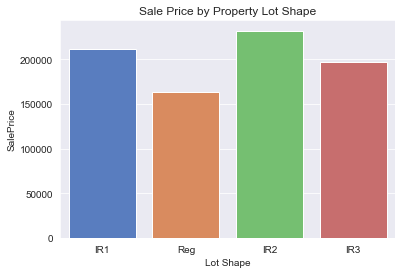

In [22]:
sns.barplot(data=train,x='Lot Shape',y='SalePrice',palette='muted',ci=False)
plt.title('Sale Price by Property Lot Shape');
plt.savefig('../figures/lotshape.png')

### Mean Sale Price by Land Contour

In [23]:
train[['SalePrice']].groupby(train['Land Contour']).mean().sort_values(by='SalePrice')

,SalePrice
Land Contour,
Bnk,142123.743590
Lvl,178998.564840
Low,192786.600000
HLS,262294.488095


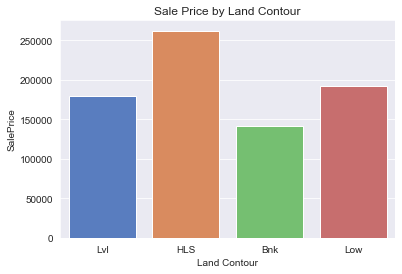

In [24]:
sns.barplot(data=train,x='Land Contour',y='SalePrice',palette='muted',ci=False)
plt.title('Sale Price by Land Contour');
plt.savefig('../figures/contour.png')

In [25]:
train[['SalePrice']].groupby(train['Sale Type']).mean().sort_values(by='SalePrice')

,SalePrice
Sale Type,
ConLw,124600.000000
Oth,127497.750000
ConLD,129091.352941
COD,133574.523810
WD,174724.251969
CWD,186635.000000
ConLI,207992.857143
Con,241807.500000
New,280459.993631


### Newly Constructed and Contract 15% Down payment regular terms stand out significantly

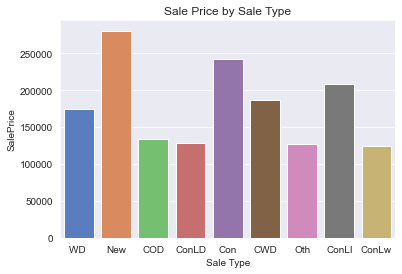

In [26]:
sns.barplot(data=train,x='Sale Type',y='SalePrice',palette='muted',ci=False)
plt.title('Sale Price by Sale Type');
plt.savefig('../figures/saletype.png')

### List of Categoricals whose distributions are diverse enough to be worth exploring.
#### If theres a significant trend between a categorical and Sale Price, but almost all of the entries are the same sub-category, then it won't be good for training the model

#### Here's an example, theres a strong average price difference between houses grouped by roof material

In [27]:
train[['SalePrice']].groupby(train['Roof Matl']).mean().sort_values(by='SalePrice')

,SalePrice
Roof Matl,
CompShg,180697.414151
Tar&Grv,187948.933333
Membran,241500.000000
WdShake,264250.000000
WdShngl,354250.000000


#### However, there's only 4 entries where a house has a the roofing material with a high aggregated sale price

In [28]:
train['Roof Matl'].value_counts()

CompShg    2021
Tar&Grv      15
WdShngl       4
WdShake       4
Membran       1
Name: Roof Matl, dtype: int64

In [29]:
#Normalized
train['Roof Matl'].value_counts(normalize=True)

CompShg    0.988264
Tar&Grv    0.007335
WdShngl    0.001956
WdShake    0.001956
Membran    0.000489
Name: Roof Matl, dtype: float64

In [30]:
for categoricals in cat_features:
    if train[categoricals].value_counts(normalize=True).max()<0.80:
        print(categoricals)

MS Zoning
Lot Shape
Lot Config
Neighborhood
House Style
Roof Style
Exterior 1st
Exterior 2nd
Mas Vnr Type
Foundation
Garage Type
Garage Finish


## Big Scary Heatmap

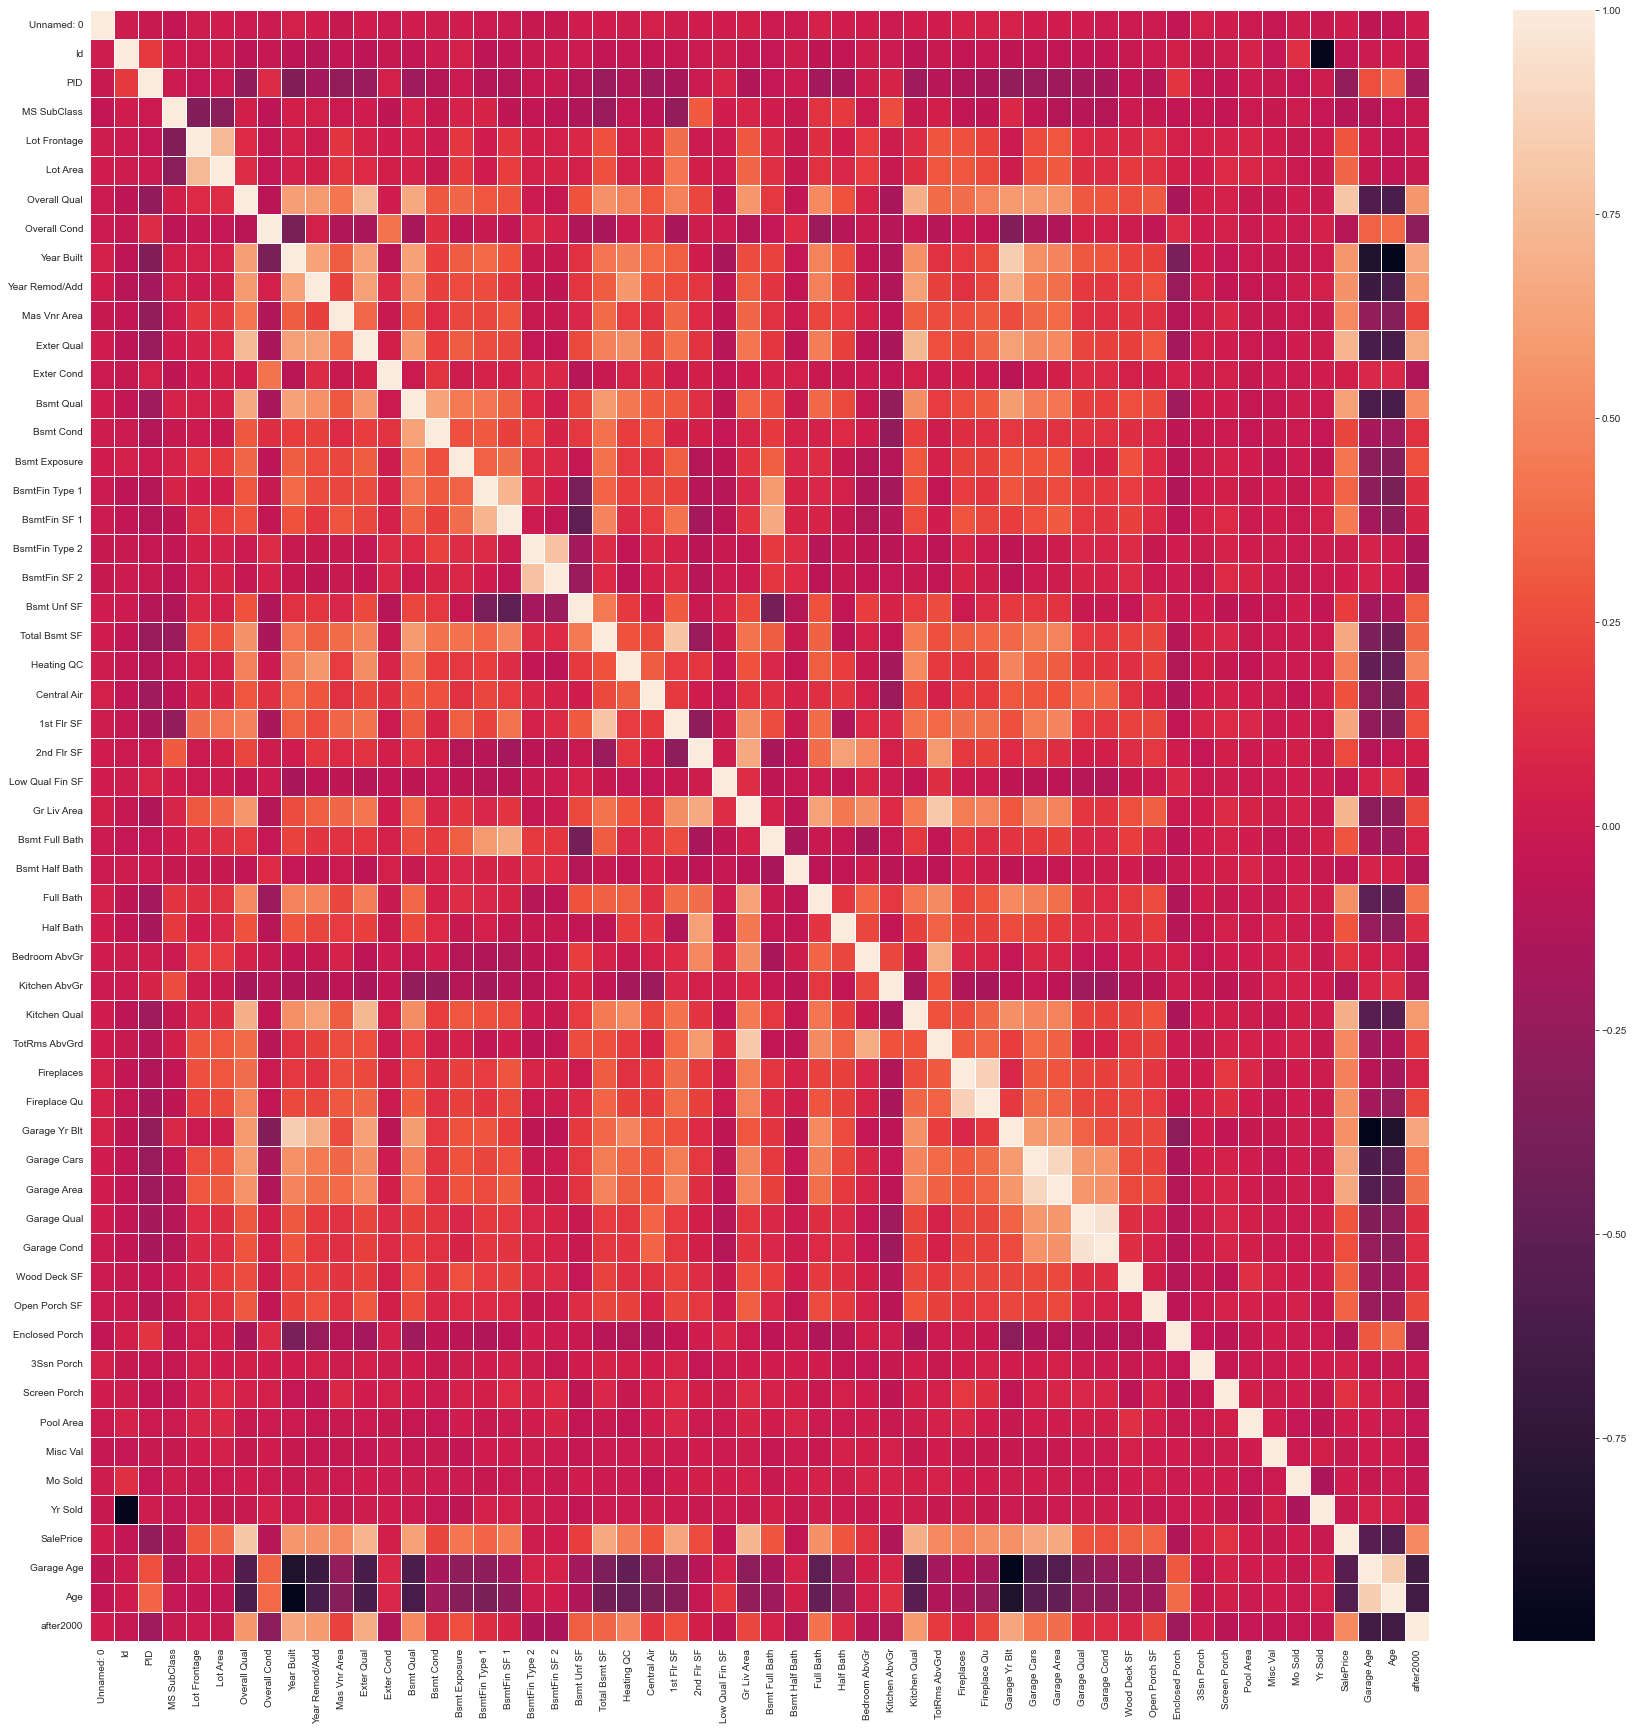

In [31]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),cmap='rocket',linewidths=1);

### Tiny not-so-scary Heatmap

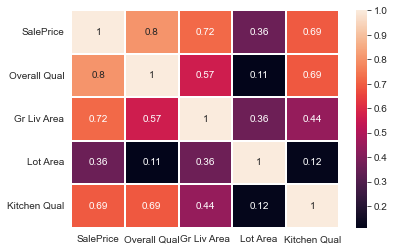

In [32]:
sns.heatmap(train[['SalePrice','Overall Qual','Gr Liv Area','Lot Area','Kitchen Qual']].corr(),cmap='rocket',annot=True,linewidths=2);

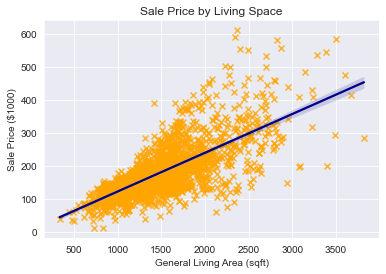

In [33]:
sns.regplot(x='Gr Liv Area', y=train['SalePrice']/1000, data=train, color='orange', marker='x', line_kws={'color':'darkblue'});
plt.xlabel('General Living Area (sqft)')
plt.ylabel('Sale Price ($1000)')
plt.title('Sale Price by Living Space')
plt.savefig('../figures/livingspace.png')

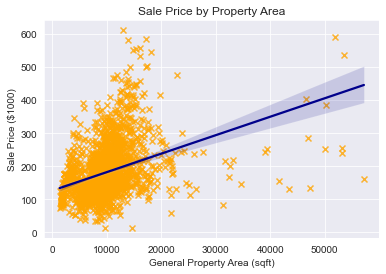

In [34]:
sns.regplot(x='Lot Area', y=train['SalePrice']/1000, data=train, color='orange', marker='x', line_kws={'color':'darkblue'});
plt.xlabel('General Property Area (sqft)')
plt.ylabel('Sale Price ($1000)')
plt.title('Sale Price by Property Area')
plt.savefig('../figures/propertyarea.png')

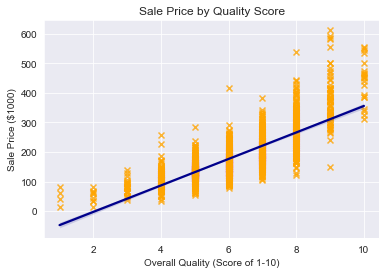

In [35]:
sns.regplot(x='Overall Qual', y=train['SalePrice']/1000, data=train, color='orange', marker='x', line_kws={'color':'darkblue'});
plt.xlabel('Overall Quality (Score of 1-10)')
plt.ylabel('Sale Price ($1000)')
plt.title('Sale Price by Quality Score')
plt.savefig('../figures/qualityscore.png')

#### Overall Condition of the House has no correlation with Sale Price or even overall house material quality

In [36]:
train[['Overall Qual', 'Overall Cond', 'SalePrice']].corr()

,Overall Qual,Overall Cond,SalePrice
Overall Qual,1.000000,-0.081131,0.803732
Overall Cond,-0.081131,1.000000,-0.097114
SalePrice,0.803732,-0.097114,1.000000


#### It appears that whoever filled in the surveys for the housing scores assigned almost every house an average nominal score for overall condition

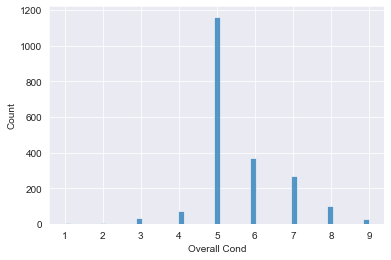

In [37]:
sns.histplot(train['Overall Cond']);

### Listing all numerical values that have a correlation with Sale Price that's higher than 0.5 in ascending order

In [38]:
train.corr()['SalePrice'][train.corr()['SalePrice']>0.5].sort_values(ascending=True)

Mas Vnr Area      0.511255
TotRms AbvGrd     0.512007
after2000         0.513361
Full Bath         0.537486
Fireplace Qu      0.538739
Garage Yr Blt     0.542891
Year Remod/Add    0.550618
Year Built        0.573139
Bsmt Qual         0.612999
1st Flr SF        0.647281
Garage Cars       0.648584
Garage Area       0.655389
Total Bsmt SF     0.664174
Kitchen Qual      0.693914
Exter Qual        0.716507
Gr Liv Area       0.719591
Overall Qual      0.803732
SalePrice         1.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Sale Price ($1000)')

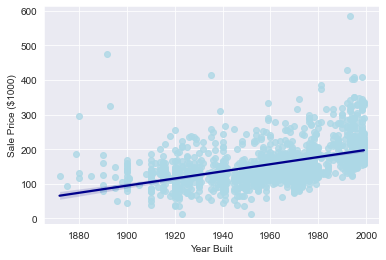

In [39]:
sns.regplot(
    x=train['Year Built'][train['Year Built']<2000],
    y=train['SalePrice'][train['Year Built']<2000]/1000,
    line_kws={'color':'darkblue'},
    color='lightblue'
)
plt.ylabel('Sale Price ($1000)')

### Interested in seeing the distribution of Sale Price Data based on whether the houses were built before or after 2000
#### We've already established that the mean housing price is significantly higher for houses built after 2000
#### Prices in houses built before 2000 are much more normally distributed, likely because theres more data in that group

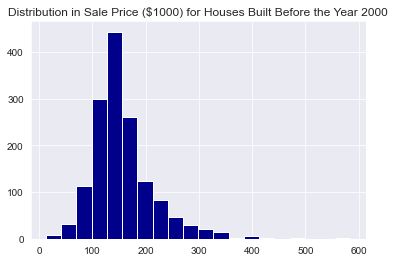

In [40]:
plt.hist(train['SalePrice'][train['Year Built']<2000]/1000, bins=20,color='darkblue')
plt.title('Distribution in Sale Price ($1000) for Houses Built Before the Year 2000');

#### Distribution of Prices for Houses built after 2000 is heavily skewed to the right

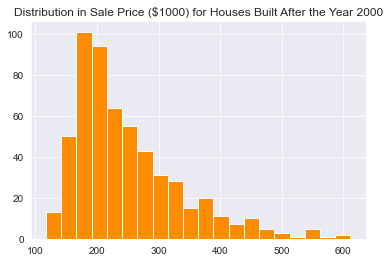

In [41]:
plt.hist(train['SalePrice'][train['Year Built']>=2000]/1000, bins=20,color='darkorange')
plt.title('Distribution in Sale Price ($1000) for Houses Built After the Year 2000');

### Kitchen Quality vs Sale Price

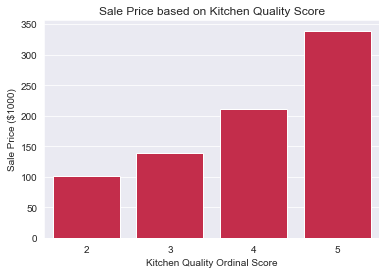

In [42]:
sns.barplot(x=train['Kitchen Qual'],
            y=train['SalePrice']/1000,
            color='crimson',
            ci = False)
plt.xlabel('Kitchen Quality Ordinal Score')
plt.ylabel('Sale Price ($1000)')
plt.title('Sale Price based on Kitchen Quality Score');
plt.savefig('../figures/kitchen.png')